In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


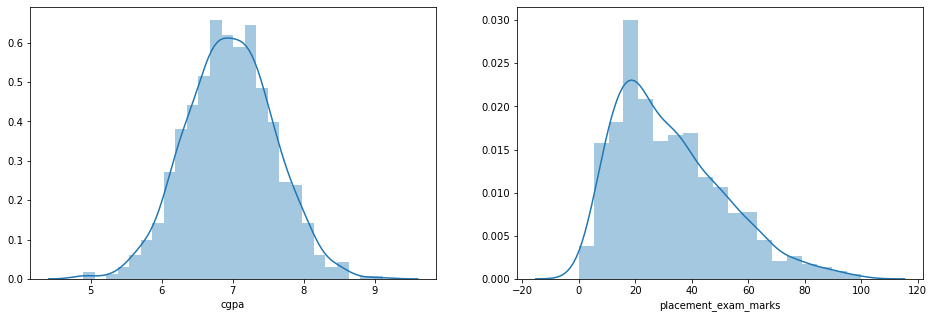

In [29]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [30]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


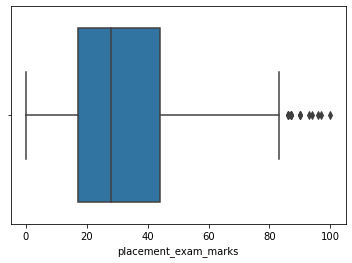

In [31]:
sns.boxplot(df['placement_exam_marks'])

In [32]:
Q1 = df['placement_exam_marks'].quantile(0.25)
Q3 = df['placement_exam_marks'].quantile(0.75)

In [33]:
IQR = Q3 - Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

upper_limit,lower_limit

(84.5, -23.5)

# TRIMMING

In [34]:
df_trimmed = df[(lower_limit < df['placement_exam_marks']) & (df['placement_exam_marks'] < upper_limit)]
df_trimmed

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


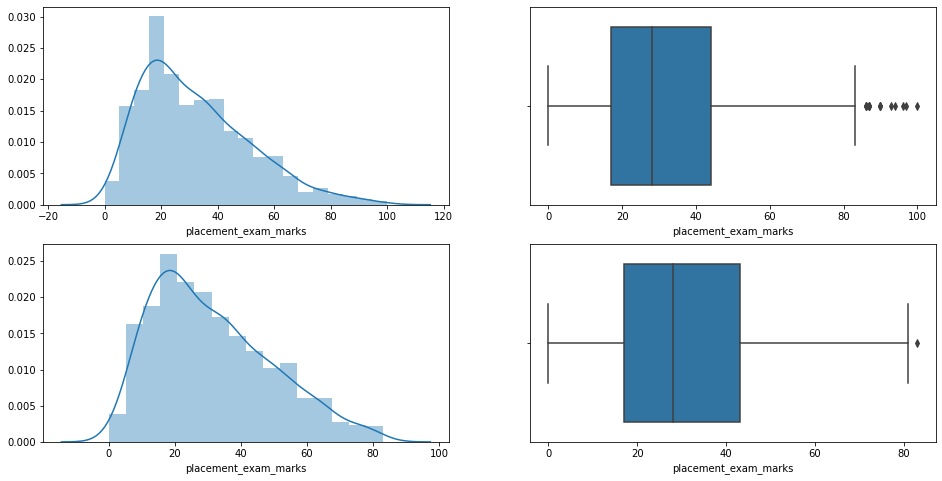

In [36]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(df_trimmed['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(df_trimmed['placement_exam_marks'])

plt.show()

# CAPPING

In [37]:
df['placement_exam_marks_capped']  = np.where(
                                        lower_limit > df['placement_exam_marks'],
                                        lower_limit,
                                        np.where(
                                        df['placement_exam_marks'] > upper_limit,
                                            upper_limit,
                                            df['placement_exam_marks']
                                        
                                        )
                                            )

In [38]:
df

,cgpa,placement_exam_marks,placed,placement_exam_marks_capped
0,7.19,26.0,1,26.0
1,7.46,38.0,1,38.0
2,7.54,40.0,1,40.0
3,6.42,8.0,1,8.0
4,7.23,17.0,0,17.0
...,...,...,...,...
995,8.87,44.0,1,44.0
996,9.12,65.0,1,65.0
997,4.89,34.0,0,34.0
998,8.62,46.0,1,46.0


In [41]:
df['placement_exam_marks_capped'].describe(),  df['placement_exam_marks'].describe()

(count    1000.000000
 mean       32.136500
 std        18.865419
 min         0.000000
 25%        17.000000
 50%        28.000000
 75%        44.000000
 max        84.500000
 Name: placement_exam_marks_capped, dtype: float64,
 count    1000.000000
 mean       32.225000
 std        19.130822
 min         0.000000
 25%        17.000000
 50%        28.000000
 75%        44.000000
 max       100.000000
 Name: placement_exam_marks, dtype: float64)

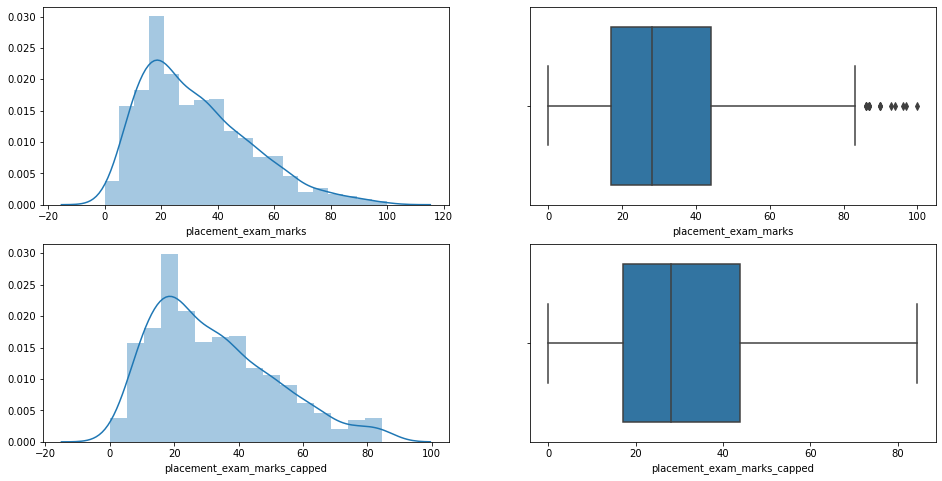

In [42]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(df['placement_exam_marks_capped'])

plt.subplot(2,2,4)
sns.boxplot(df['placement_exam_marks_capped'])

plt.show()